In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model

from tensorflow.keras.applications import ResNet50

2024-06-12 01:09:45.112211: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-12 01:09:45.114698: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-12 01:09:45.143874: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 01:09:45.687163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# URLs das imagens para download
image_urls ={
    "animais":[
        "https://inovaveterinaria.com.br/wp-content/uploads/2024/01/Inova-Veterinaria-Cachorro-com-ansiedade-entenda-por-que-acontece-e-o-que-fazer-GS2-Marketing-Divulgacao.jpg",
        "https://p2.trrsf.com/image/fget/cf/774/0/images.terra.com/2024/03/07/1859810768-maltes-cachorro.jpg",
        "https://www.astra-sa.com/destaques/wp-content/uploads/2022/04/COMO_CUIDAR_DE_CACHORRO1.jpg",
        "https://imagens.ebc.com.br/UVtAHFR2rmtUR-GTHu8dhZp8N5g=/1600x800/https://agenciabrasil.ebc.com.br/sites/default/files/thumbnails/image/notholebias_minimus_peixe_das_nuvens_-_foto_gustavo_henrique_soares_guedes.jpg?itok=o8-fJzrl",
        "https://saude.abril.com.br/wp-content/uploads/2021/03/bichos-foto-vauvau-Getty-Images.png?w=680&h=440&crop=1",
        "https://media.istockphoto.com/id/165637260/pt/foto/aqua-cultura-pargo-com-tra%C3%A7ado-de-recorte.jpg?s=612x612&w=0&k=20&c=ihI3Zs_bFaw1Im3poyVRlVYFOF6Rr1YN9xdnTvM_ClU=",
        "https://static.mundoeducacao.uol.com.br/mundoeducacao/2023/02/noivinha-ave.jpg",
        "https://cptstatic.s3.amazonaws.com/imagens/enviadas/materias/materia14399/galinha-caipira-uov.jpg",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzarBIcpAS27CdUuPhBDGqC0TD1QYYxq1dJaCgUQ7hU2Ec5e1VXHAXUnNNPEE8duB3uVQ&usqp=CAU",
        "https://img.freepik.com/fotos-premium/galinha-castanha-de-pe-orgulhosamente-isolada-em-fundo-branco-perfeita-para-animais-de-fazenda-ou-galinhas_817921-6980.jpg",
        "https://www.infoescola.com/wp-content/uploads/2017/04/galinha-101572393.jpg",
        "https://i0.statig.com.br/bancodeimagens/4p/tn/iw/4ptniw5sc3aexg3mfpe0644ui.jpg",
        "https://s2-vidadebicho.glbimg.com/VWErPCHwV7IysYE39g21Zo-4jpU=/0x0:640x426/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_fb623579cd474803aedbbbbae014af68/internal_photos/bs/2022/O/t/cMpvylQCytHjZO2sy3rw/2022-02-15-como-o-gato-virou-um-animal-domestico-vida-de-bicho.jpeg",
        "https://blog.cobasi.com.br/wp-content/uploads/2021/08/caracteristicas-do-gato-1-1.png",
        "https://cptstatic.s3.amazonaws.com/imagens/enviadas/materias/materia16043/caracteristicas-cavalos-saudaveis-artigos-cursos-cpt.jpg",
        "https://www.google.com/url?sa=i&url=https%3A%2F%2Fviajarverde.com.br%2Fturismo-com-animais-silvestres%2F&psig=AOvVaw3vozkiXJEUacSFHmyg13-G&ust=1718236634760000&source=images&cd=vfe&opi=89978449&ved=2ahUKEwjqxKez4NSGAxXyALkGHS-ECbIQjRx6BAgAEBU",
        "https://caesegatos.com.br/wp-content/uploads/amazona-de-frente-turquesa-amazona-aestiva-lindo-papagaio-brasileiro.jpg",
        "https://www.neonpetshop.com.br/blog/wp-content/uploads/2016/03/periquito.jpg",
        "https://blog-static.petlove.com.br/wp-content/uploads/2021/05/papagaio-brasileiro.jpg",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRti2LLW_PgDMZqqhh9hR_cvnYBX6gX2UkMqA&s",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfWLMcBrX_FP1NrLu2FudUipCFq4wGOtG-2Q&s",
        "https://blog.cobasi.com.br/wp-content/webpc-passthru.php?src=https://blog.cobasi.com.br/wp-content/uploads/2022/11/311909025_3457951184530411_7040105529685148159_n-1024x683.jpg&nocache=1",
],
    "frutas":[
        "https://cdn.shoppub.io/cdn-cgi/image/w=1000,h=1000,q=80,f=auto/cenourao/media/uploads/produtos/foto/51d503f92975file.png",
        "https://p2.trrsf.com/image/fget/cf/774/0/images.terra.com/2012/09/29/120834951.jpg",
        "https://scfoods.fbitsstatic.net/img/p/pera-williams-unidade-70671/257173.jpg?w=800&h=800&v=no-change&qs=ignore",
        "https://www.infoescola.com/wp-content/uploads/2010/04/banana_600797891.jpg",
        "https://tdc1fe.vteximg.com.br/arquivos/ids/161479-1000-1000/FRUTA-MELANCIA-KG.jpg?v=637516889423770000",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSL11M6Tjij5CVAgkE6fkpciKXmW2WT-EAwDA&s",
        "https://s3.static.brasilescola.uol.com.br/be/2021/04/kiwizeiro.jpg",
        "https://s1.static.brasilescola.uol.com.br/be/conteudo/images/fruto-polpa-rosada-apta-para-consumo-537e5dda94063.jpg",
        "https://ceagesp.gov.br/wp-content/uploads/2016/09/goiaba200916-412x274.jpg",
        "https://images.tcdn.com.br/img/img_prod/763396/cereja_41_1_20200319005506.jpg",
        "https://acdn.mitiendanube.com/stores/837/833/products/cereja-verdadeira-gde1-060eb8957ea40a99de16509072815442-240-0.jpg",
        "https://doutorjairo.com.br/media/uploads/istock-fruta.jpg",
        "https://catracalivre.com.br/wp-content/uploads/2024/04/fruta-que-foi-eleita-a-mais-saudavel-do-mundo-e-seus-beneficios.jpg",
        "https://static.nationalgeographicbrasil.com/files/styles/image_3200/public/nationalgeographic1427524.jpg?w=760&h=1140",
        "https://avozdaserra.com.br/sites/default/files/noticias/caderno-z-fruta-outono-foto-henrique-pinheiro-03_0.jpg",
        "https://images.squarespace-cdn.com/content/v1/5b8edfa12714e508f756f481/1538676993194-2GX4EPL3XZ83FEFGA5GY/morango.jpg?format=1000w",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiz2fbqMSgGMEGsAKY4J2LNF_J0nckmM9_3Q&s",
    ],
    "carro":[
        "https://s2-autoesporte.glbimg.com/AD-Zmic9Id3pFylnmirMPJPqJXM=/0x0:1200x725/888x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_cf9d035bf26b4646b105bd958f32089d/internal_photos/bs/2022/Y/Q/GDvW7QSNeaQ801rDC8Rg/hrv-movimentdianteira.jpg",
        "https://blog.toyotasulpar.com.br/wp-content/uploads/2022/12/dicas-comprar-toyota-novo-curitiba.jpg",
        "https://s2-autoesporte.glbimg.com/drQR6gvrjQcU1AM7qYLiU0EaL7g=/0x0:2514x1508/888x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_cf9d035bf26b4646b105bd958f32089d/internal_photos/bs/2023/b/e/9rUuBCT3aCIAlByA72Gw/2189700-rbemsavlas.jpg",
        "https://img.odcdn.com.br/wp-content/uploads/2023/06/fiat-argo-cvt.jpg",
        "https://www.carroaluguel.com/blog/wp-content/uploads/2012/03/estacionar.jpg",
        "https://jpimg.com.br/uploads/2021/03/foto-2.jpg",
        "https://stcotvfoco.com.br/2023/04/Alerta-novo-golpe-envolvendo-o-seu-carro-Foto-Reproducao-Internet.jpg",
        "https://stcotvfoco.com.br/2023/04/Carro-Chevrolet-estacionado-na-rua-Foto-Reproducao-Internet.jpg",
        "https://thumbs.dreamstime.com/b/carro-de-fam%C3%ADlia-ii-6096563.jpg",
        "https://stcotvfoco.com.br/2023/04/Carro-Chevrolet-estacionado-na-rua-Foto-Reproducao-Internet.jpg",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6JFNjLthJUgM79ZMAQIFnVtDOPJ6vmdKgkavoEA_MKbaCZmPy01XofW-UExcLbHtcUAM&usqp=CAU",
        "https://d3rf2zoedgusog.cloudfront.net/wp-content/uploads/201403100848370000005155.jpg",
        "https://s2-autoesporte.glbimg.com/hl-YD-4O5f3SuSuWI73dgww6Xyc=/0x0:620x413/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_cf9d035bf26b4646b105bd958f32089d/internal_photos/bs/2020/U/q/8abnIBRFStIIitk2LTOw/2017-12-05-carro-da-uber-para-mapeamento-de-ruas.jpg",
        "https://nxboats.com.br/wp-content/uploads/2023/11/Lamborghini.jpg",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhWkOcGQLHsETkQ4QAepP-5EOHvqDrS15_b32aMsVLWNyT-mxpADPchotFdJyqRd6JsQk&usqp=CAU",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyXdbc-7peYSIilqL-rI92kYnwDAt7gLMsWg&s",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKqyhWDXOu02YzgRRrndXWJnXhJPEMQ822XQ&s",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLzH9bgK6ito4sZuJOcFz3YSZzRcCEDXQEQA&s",
        "https://racingonline.com.br/wp-content/uploads/2020/04/378217_935948_large_47_mclarenm6gt.jpg"
    ],
    "papelaria":[
        "https://cdn.dooca.store/109683/products/bjoecqwplak7pxlqbhlihnuihityavbwnblf.png?v=1709322743",
        "https://jetofficebrasil.com.br/images/services/papelaria.png",
        "https://blog.richlaser.com.br/wp-content/uploads/2020/12/Papelaria-personalizada-para-empresas.jpg",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFaZbfmmosJD2KBSpxOWKWQPhxH8_3YjSBjf5c1UIcxkeWqhWHfVsM2mNh6JpIIfKC6Qw&usqp=CAU",
        "https://cdn.awsli.com.br/2554/2554148/arquivos/papelaria%20fina.png",
        "https://beagaembalagem.com.br/wp-content/uploads/2022/01/folha-a4.jpg",
        "https://scrapfer.com.mx/cdn/shop/files/D_NQ_NP_2X_785378-MLM45060764254_032021-F_805cde2e-dfda-40bf-8271-8321a7ff6358_530x@2x.webp?v=1689301925",
        "https://www.lojatudoemum.com.br/media/catalog/product/cache/1/image/800x/9df78eab33525d08d6e5fb8d27136e95/c/a/caderno-espiral-capa-dura-universitario-10-materias-pepper-feminino-160-folhas_159816-e4_1.jpg",
        "https://cdnv2.moovin.com.br/marbig/imagens/produtos/det/caderno-espiral-capa-dura-universitario-20-materias-pepper-feminino-320-folhas-img-170214_2303240612078955.jpg",
        "https://cdn.awsli.com.br/600x450/826/826380/produto/163929073/03d5509b38.jpg",
        "https://www.papelariaartnova.com.br/img/products/caderno-espiral-univ-capa-dura-16x1-256-fls-zip-preto-tilibra-340821_1_600.jpg",
        "https://images.tcdn.com.br/img/img_prod/868471/caneta_point_88_preta_stabilo_477_2_0808279666d4df80874e186e2fdff594.png",
        "https://cdn.awsli.com.br/600x450/2419/2419289/produto/206084012ba830a19a6.jpg",
        "https://acdn.mitiendanube.com/stores/001/676/220/products/06d91b39950c89c7170351e27591ae51awsaccesskeyidakiatclmsgfx4j7tu445expires1682856477signaturey4bmsonk1f53mowz93kee824n7s3d-4a49b4d8aa6531657c16802644992320-1024-1024.",
        "https://images.tcdn.com.br/img/img_prod/1159550/caneta_bic_cristal_azul_35_1_ff05fa74bdc393ab36ebdbba429cf9f3.jpg",
        "https://images.tcdn.com.br/img/img_prod/1130048/lapis_preto_eco_grip_triangular_faber_castell_2305_1_ee3682b68979bb406374656aaa880871.jpg",
        "https://cdn.awsli.com.br/600x1000/2358/2358068/produto/223295689/073bafcf-eae0-4cfc-93ac-d17b60783aa2-96xvtdu1cz.jpg",
        "https://www.arcoirisembalagem.com.br/imagens/itens/grande/000006001.1.jpg",
        "https://singer.vteximg.com.br/arquivos/ids/161020-1000-1000/250020396_1.jpg?v=638000874871930000",
        "https://cdnv2.moovin.com.br/marbig/imagens/produtos/det/grampeador-25-folhas-metalico-de-mesa-g104-preto-img-58467.jpg"
    ],
    "planta":[
        "https://imagens-revista.vivadecora.com.br/uploads/2022/07/A-azaleia-e-uma-planta-resistente-que-pode-ser-plantada-em-pequenos-canteiros.-Fonte-Pixabay.jpg",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwsj0UhOd0AY3oIV6fbAAY4PG3Msyirs0hTfA6jqy5FgF_a_sZlMNceiNhI2kBAM6vmDM&usqp=CAU",
        "https://blog.construtoralaguna.com.br/wp-content/uploads/2021/02/Conhec%CC%A7a-a-planta-e-a-flor-de-2021-Construtora-Laguna.png",
        "https://www.kukyflor.com/blog/wp-content/uploads/2018/01/girasol.jpg",
        "https://decoracaobrasil.com/wp-content/uploads/2022/08/plantas-pendentes-com-flores.png",
        "https://superuniversodasplantas.com.br/wp-content/uploads/2023/07/76fe312a4315f1d38906cb56a1eae8b8.jpg",
        "https://arkpad.com.br/wp-content/uploads/2020/10/flores-que-gostam-de-sol-07.jpg",
        "https://i.pinimg.com/236x/f1/be/86/f1be86a7132f7d1ccfc98a809a234e5e.jpg",
        "https://www.portaldoagronegocio.com.br/img/cache/cover//storage/images/notices/5f4c25f954fac.jpg",
        "https://m.media-amazon.com/images/I/61IuAPwGS7L._AC_UF350,350_QL80_.jpg",
        "https://imagens-revista.vivadecora.com.br/uploads/2022/07/A-flor-Kalanchoe-deve-ser-adubada-anualmente-para-estimular-a-sua-flora%C3%A7%C3%A3o.-Fonte-Garden-Goods-Direct.jpg",
        "https://flores.culturamix.com/blog/wp-content/gallery/flor-2-3/calandiva-kalanchoe-blossfeldiana.jpg",
        "https://imagens-revista.vivadecora.com.br/uploads/2022/07/Begonia.-Fonte-Balcony-Garden-Web.jpg",
        "https://imagens-revista.vivadecora.com.br/uploads/2022/07/Anturio.-Fonte-Petz.jpg",
        "https://s2-casaejardim.glbimg.com/jtssDqok_Fe1nHxy3bC87KJ2h2E=/0x0:984x1024/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_a0b7e59562ef42049f4e191fe476fe7d/internal_photos/bs/2023/q/8/n6iA2SRbS2TkNBNnmmKw/1-plantas-para-apartamento-confira-25-especies-indicadas-e-cuidados-necessarios.jpg",
        "https://cdn.awsli.com.br/600x450/1112/1112786/produto/49503546/990cd11064.jpg",
        "https://images.tcdn.com.br/img/img_prod/798302/planta_jiboia_epipremmum_pinnatum_629_1_4e25c9128899f41618ae4d56c9cb6e8f.jpg",
        "https://s2.glbimg.com/aolshcRY2uBvI3SQzYfG2vWr350=/620x650/e.glbimg.com/og/ed/f/original/2020/12/11/costela-de-adao.jpg",
        "https://multimidia.gazetadopovo.com.br/media/info/2017/201710/plantas-problemas-deficiencia-nitrogenio.png",
        "https://imagenes.elpais.com/resizer/v2/QDZ4WLNJQJNINLCWC3TF6SVNJY.jpg?auth=5ebab651f767a1bc4579df9581ca9910746803cd5553b99ba4b4913fdcae3c72&width=414",
        "https://st4.depositphotos.com/10614052/23625/i/450/depositphotos_236251406-stock-photo-different-houseplants-white-background.jpg",
        "https://iloveflores.com/wp-content/uploads/2021/09/Tulipas-Holandesas.jpg",
    ]
}

In [3]:
# Crie um diretório para armazenar as imagens baixadas
os.makedirs('images', exist_ok=True)

# Função para baixar imagens
def download_images(urls):
    for chave, lista in urls.items():
        print(f"Carregando as imagens da categoria {chave}")
        # Cria o diretório para a chave se ele não existir
        os.makedirs(f'images/{chave}', exist_ok=True)
        for i, url in enumerate(lista):
            response = requests.get(url)
            if response.status_code == 200:  # Verifica se o download foi bem-sucedido
                with open(f'images/{chave}/image_{i}.jpg', 'wb') as file:
                    file.write(response.content)
            else:
                print(f"Falha ao baixar a imagem {url}")


# Baixe as imagens
download_images(image_urls)

Carregando as imagens da categoria animais
Falha ao baixar a imagem https://univitta.net/backend/web/uploads/blog/posts/uso-de-gordura-na-dieta-dos-cavalos-principalmente-para-animais-de-alto-desempenho_20190203202948.jpg
Carregando as imagens da categoria frutas
Carregando as imagens da categoria carro
Carregando as imagens da categoria papelaria
Carregando as imagens da categoria planta


Exibindo imagens da subpasta: animais


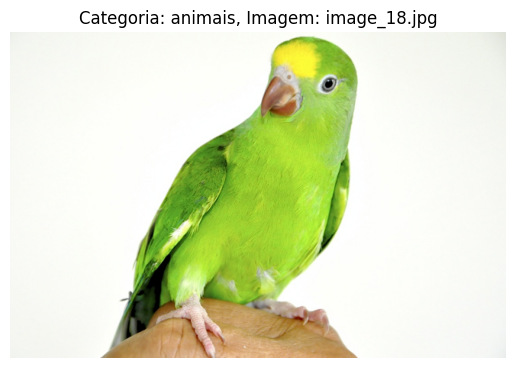

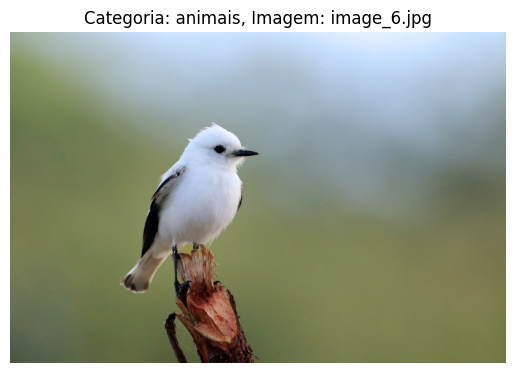

Exibindo imagens da subpasta: carro


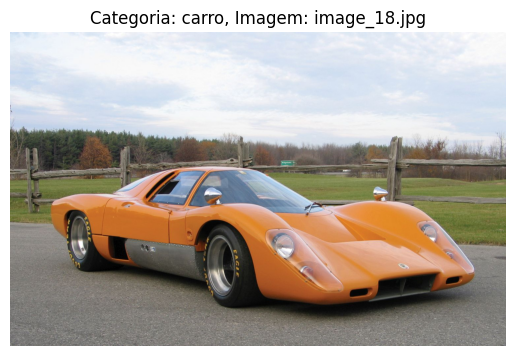

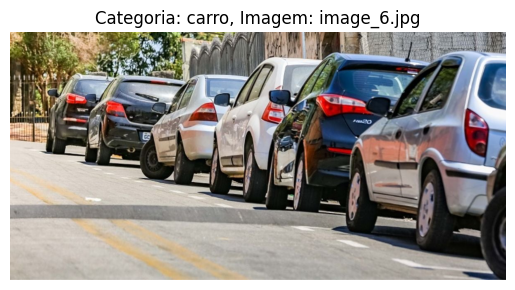

Exibindo imagens da subpasta: frutas


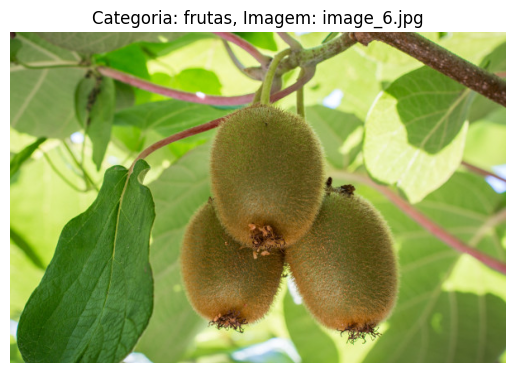

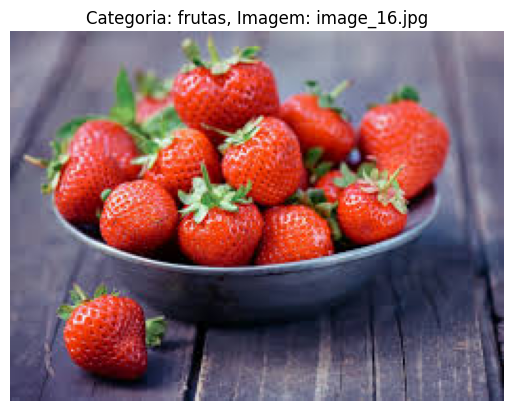

Exibindo imagens da subpasta: planta


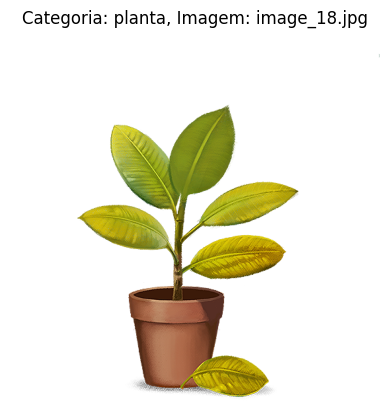

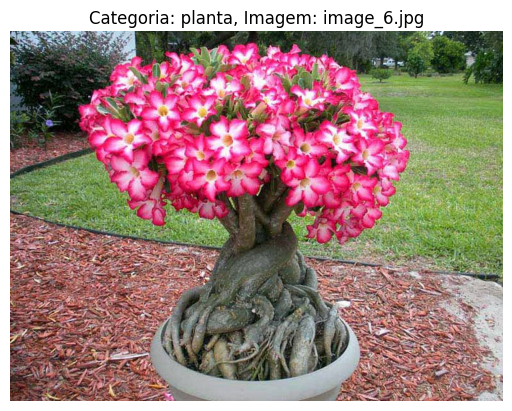

Exibindo imagens da subpasta: papelaria


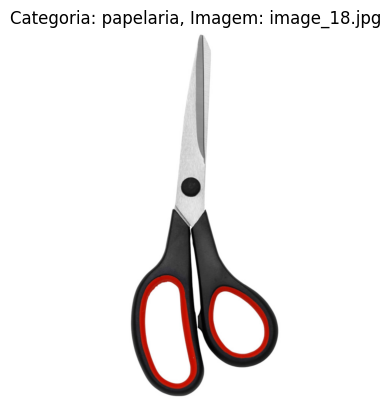

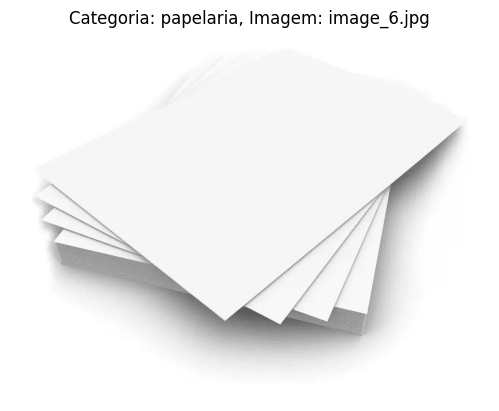

In [4]:
def load_and_display_images(main_folder, num_images=2):
    for subdir in os.listdir(main_folder):
        subdir_path = os.path.join(main_folder, subdir)
        if os.path.isdir(subdir_path):
            print(f"Exibindo imagens da subpasta: {subdir}")
            image_files = os.listdir(subdir_path)
            for image_file in image_files[:num_images]:
                img_path = os.path.join(subdir_path, image_file)
                try:
                    img = Image.open(img_path)
                    plt.imshow(img)
                    plt.title(f'Categoria: {subdir}, Imagem: {image_file}')
                    plt.axis('off') 
                    plt.show()
                except Exception as e:
                    print(f"Erro ao carregar a imagem {img_path}: {e}")

# Carregue e visualize as imagens baixadas
load_and_display_images('images')

In [5]:
def preprocess_images(main_folder, target_size=(224, 224)):
    processed_images = []
    labels = []
    for subdir in os.listdir(main_folder):
        subdir_path = os.path.join(main_folder, subdir)
        if os.path.isdir(subdir_path):
            for image_file in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, image_file)
                try:
                    img = Image.open(img_path).resize(target_size)
                    if img.mode != 'RGB':
                        img = img.convert('RGB') 
                    img_array = np.array(img) / 255.0 
                    if img_array.shape == (224, 224, 3): 
                        processed_images.append(img_array)
                        labels.append(subdir)  # Usa o nome do subdiretório como rótulo
                    else:
                        print(f"Imagem {img_path} tem forma incorreta: {img_array.shape}")
                except Exception as e:
                    print(f"Erro ao processar a imagem {img_path}: {e}")
    return np.array(processed_images), np.array(labels)

# Pré-processamento das imagens
processed_images, labels = preprocess_images('images')

# Exibir as formas dos arrays processados
print(f"Processed images shape: {processed_images.shape}")
print(f"Labels shape: {labels.shape}")

# Codificação dos rótulos para números inteiros
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Número de classes
num_classes = len(np.unique(encoded_labels))
print(f"Number of classes: {num_classes}")

Erro ao processar a imagem images/animais/image_16.jpg: cannot identify image file 'images/animais/image_16.jpg'
Processed images shape: (101, 224, 224, 3)
Labels shape: (101,)
Number of classes: 5


Modelo de classificação de imagens utilizando uma arquitetura de Rede Neural Convolucional (CNN).
Dividi o conjunto de dados em conjuntos de treinamento e teste.
Projeta e treina a CNN usando TensorFlow.
Avalia o desempenho do modelo. 
Calcula a acurácia do modelo

In [8]:
# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(processed_images, encoded_labels, test_size=0.2, random_state=42)

# Definição do modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

######
# Carregar o modelo ResNet50 pré-treinado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adicionar camadas ao modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Congelar as camadas convolucionais do modelo base
base_model.trainable = False
###################

# Compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Avaliação do modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Previsão com o modelo treinado
predictions = model.predict(X_test)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1570 - loss: 1.7422 - val_accuracy: 0.2381 - val_loss: 1.6938
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 793ms/step - accuracy: 0.2219 - loss: 1.7127 - val_accuracy: 0.0952 - val_loss: 1.5557
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 781ms/step - accuracy: 0.2547 - loss: 1.5791 - val_accuracy: 0.3810 - val_loss: 1.5836
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 788ms/step - accuracy: 0.2484 - loss: 1.5236 - val_accuracy: 0.2857 - val_loss: 1.5358
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 783ms/step - accuracy: 0.3406 - loss: 1.4819 - val_accuracy: 0.3810 - val_loss: 1.5308
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 786ms/step - accuracy: 0.3242 - loss: 1.4454 - val_accuracy: 0.3810 - val_loss: 1.5574
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 788ms/step - accuracy: 0.3844 - loss: 1.4427 - val_accuracy: 0.2381 - val_loss: 1.5495
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 787ms/step - accuracy: 0.3172 - loss: 1.3940 - val_accuracy: 0.5238 - val_loss: 1.

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adicionar novas camadas de classificação
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

# Criar o novo modelo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo com Transfer Learning
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Avaliação do modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2672 - loss: 8.4940 - val_accuracy: 0.6667 - val_loss: 2.0977
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7789 - loss: 1.2066 - val_accuracy: 0.6667 - val_loss: 6.0268
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8211 - loss: 2.7831 - val_accuracy: 0.7619 - val_loss: 3.3257
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8820 - loss: 0.3759 - val_accuracy: 0.7619 - val_loss: 1.2331
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9375 - loss: 0.1588 - val_accuracy: 0.8571 - val_loss: 1.9582
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9734 - loss: 0.1183 - val_accuracy: 0.8571 - val_loss: 1.7790
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9820 - loss: 0.0277 - val_accuracy: 0.8571 - val_loss: 1.3804
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 5.0974e-04 - val_accuracy: 0.8571 - val_loss: 1.2413
Epoch 9/20
3

In [14]:
from io import BytesIO

# Função para carregar e pré-processar a nova imagem
def load_and_preprocess_image(image_url, target_size=(224, 224)):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).resize(target_size)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_array = np.array(img) / 255.0  # Normalize para [0, 1]
    return np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão extra para batch

# Função para prever a classe de uma nova imagem
def predict_image_category(image_url):
    img_array = load_and_preprocess_image(image_url)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    probabilities = prediction[0]
    # Converter as probabilidades em porcentagens
    probabilities_percent = np.max(prediction) * 100
    return predicted_label, probabilities_percent

# URL da nova imagem para classificação
# new_image_url = 'https://braziljournal.com/wp-content/uploads/2023/11/elefante.jpeg'
# new_image_url ='https://m.media-amazon.com/images/I/61+peSCE1nL._AC_UF894,1000_QL80_.jpg'
# new_image_url ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBJM-NPs0JSIUYvq7rJHQ5Ez4eEBKzTCfmyw&s'
new_image_url ='https://images.tcdn.com.br/img/img_prod/1173379/cola_branca_escolar_90g_1_un_piratininga_13814_1_a265bf5f4a3610650e1ad708a8a4ef90.jpg'
# Classificação da nova imagem
predicted_category, probabilities = predict_image_category(new_image_url)
print(f'A nova imagem pertence à categoria: {predicted_category}')
print(f'Probabilidades de cada classe: {probabilities}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
A nova imagem pertence à categoria: papelaria
Probabilidades de cada classe: 100.0%
